In [1]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Json에 있는 Segmentation Annotation 들이 그리는 것

In [2]:
json_dir = os.path.join("/opt/ml/segmentation/input/data/train.json")

with open(json_dir, "r", encoding="utf8") as outfile:
    datas = json.load(outfile)
    images = datas["images"]
    annotations = datas["annotations"]


In [3]:

root_dir = "/opt/ml/segmentation/input/data"
image_id = 100
file_name = images[image_id]["file_name"]   
anns = []
for anno in annotations:
    if anno["image_id"] == image_id:
        anns.append(anno)

# 원본 이미지 출력
image = cv2.imread(os.path.join(root_dir, file_name))
w, h, c = image.shape

In [4]:
import copy

image_see = []
mask_image = np.zeros([w, h])
anns = sorted(anns, key=lambda idx : len(idx['segmentation'][0]), reverse=False)
for anno in anns:
    image_id = anno["image_id"]
    temp_image = []

    # 원하는 id segmentation 살펴보기
    cate_id = anno["category_id"]
    segmentations = anno["segmentation"] # list
    
    #for cate, seg in zip(cate_id, segmentaitons):
    for seg in segmentations:
        for idx in range(0, len(seg), 2):
            x, y = seg[idx], seg[idx+1]
            mask_image[y][x] = 1
    temp_image = copy.deepcopy(mask_image)
    image_see.append([cate_id, temp_image])

        
    
    
len(image_see)

12

In [5]:
helper = 1

ipykernel_launcher:4: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


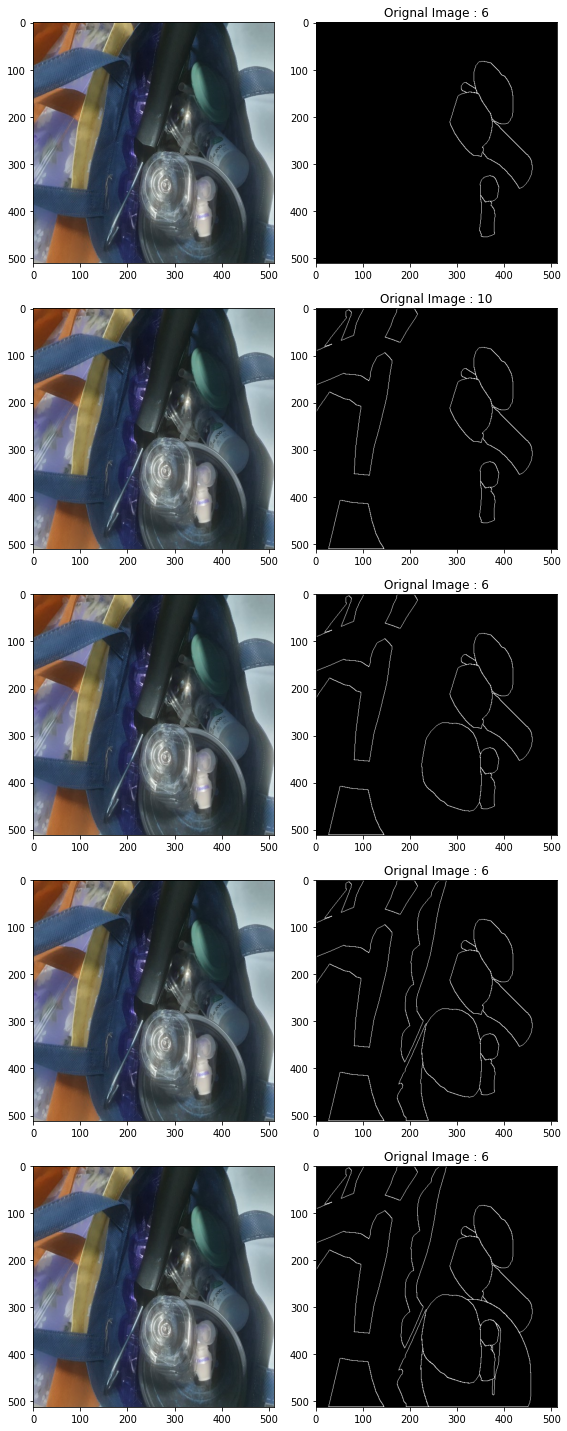

In [7]:
num_examples = 5

fig, ax = plt.subplots(nrows=num_examples, ncols=2, figsize=(4*2, 4*num_examples), constrained_layout=True)
fig.tight_layout()  

row_num = 0
for idx, (cate_id, seg_image) in enumerate(image_see):
    if idx < (helper-1) * num_examples or idx >= helper * num_examples:
        continue

    ax[row_num][0].imshow(image)
    ax[row_num][1].imshow(seg_image, cmap=plt.cm.gray)
    ax[row_num][1].set_title(f"Orignal Image : {cate_id}")

    row_num += 1
    if row_num == 10:
        break

helper += 1